In [36]:
# import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop

## Dataset Preparation
### Data Loading and Visualization

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


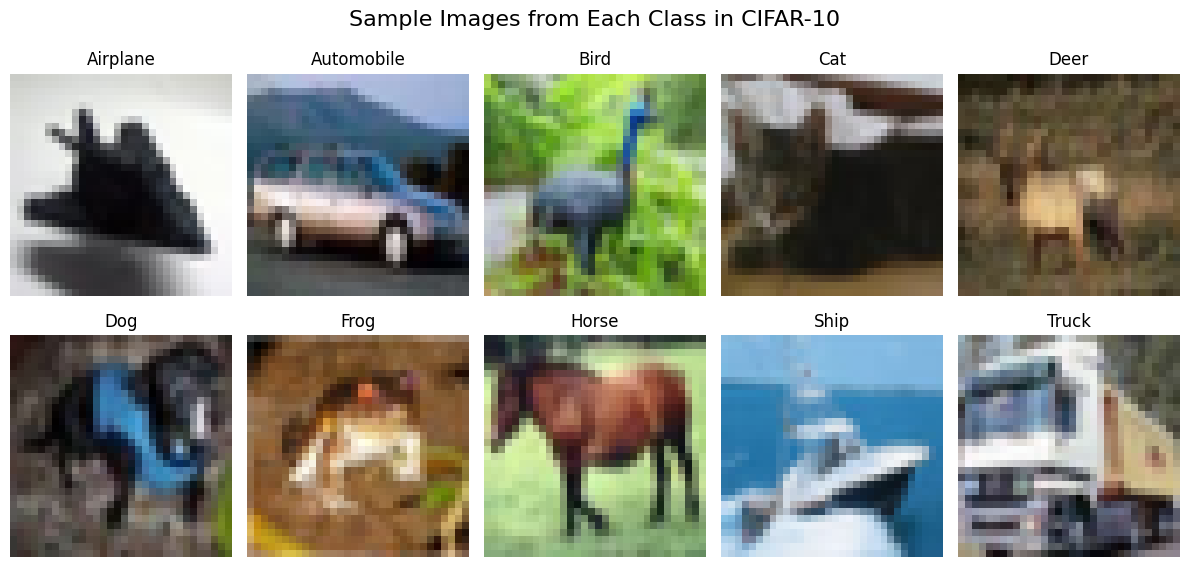

In [ ]:
# Visualize one sample image from each class
plt.figure(figsize=(12, 6))
for class_idx in range(10):
    # Get the first occurrence of each class
    idx = np.where(y_train == class_idx)[0][0]
    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(X_train[idx])
    plt.title(class_names[class_idx])
    plt.axis('off')

plt.suptitle("Sample Images from Each Class in CIFAR-10", fontsize=16)
plt.tight_layout()
plt.show()

## Image Preprocessing


In [ ]:
# Normalize the image pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


## Data Augmentation

In [ ]:
# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,            # Random rotation (±15 degrees)
    width_shift_range=0.1,        # Horizontal shift (±10% of width)
    height_shift_range=0.1,       # Vertical shift (±10% of height)
    zoom_range=0.1,               # Random zoom
    horizontal_flip=True,         # Random horizontal flip
    fill_mode='nearest'           # Fill mode for empty pixels
)

# Fit the generator to training data
datagen.fit(X_train)

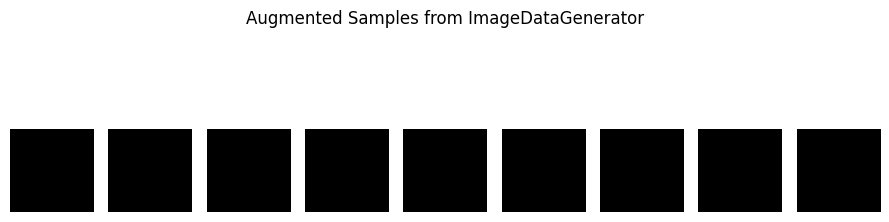

In [ ]:
# Preview a few augmented images
import matplotlib.pyplot as plt

# Pick a sample image
sample_image = X_train[0].reshape((1, 32, 32, 3))  # batch dimension needed

# Generate and plot 9 augmented versions
plt.figure(figsize=(9, 3))
for i in range(9):
    augmented = next(datagen.flow(sample_image, batch_size=1))
    plt.subplot(1, 9, i+1)
    plt.imshow(augmented[0])
    plt.axis('off')
plt.suptitle("Augmented Samples from ImageDataGenerator")
plt.tight_layout()
plt.show()


## Neural Network Implementation

In [ ]:
# Build a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),     # Flatten 32x32x3 image to 1D
    Dense(128, activation='relu'),        # First hidden layer with ReLU
    Dense(64, activation='relu'),         # Second hidden layer with ReLU
    Dense(10, activation='softmax')       # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',                           # Adaptive optimizer
    loss='categorical_crossentropy',            # Suitable for one-hot labels
    metrics=['accuracy']                        # Monitor accuracy during training
)


In [27]:
# Train the model with validation split
history = model.fit(
    X_train, y_train_cat,
    batch_size=64,             # You can use 32 instead if preferred
    epochs=15,                 # Can go up to 20
    validation_split=0.2,      # 20% of training data used for validation
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1906 - loss: 2.1644 - val_accuracy: 0.2832 - val_loss: 1.9442
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3042 - loss: 1.9068 - val_accuracy: 0.3238 - val_loss: 1.8768
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3305 - loss: 1.8501 - val_accuracy: 0.3424 - val_loss: 1.8461
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3475 - loss: 1.8097 - val_accuracy: 0.3514 - val_loss: 1.8090
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3550 - loss: 1.7811 - val_accuracy: 0.3716 - val_loss: 1.7650
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3783 - loss: 1.7365 - val_accuracy: 0.3818 - val_loss: 1.7330
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.3838 - loss: 1.7086 - val_accuracy: 0.3887 - val_loss: 1.7185
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4011 - loss: 1.6823 - val_acc

In [28]:
# Train the model using augmented data
history_aug = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=15,
    validation_data=(X_test, y_test_cat),  # Use separate test set as validation
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.4000 - loss: 1.6761 - val_accuracy: 0.4407 - val_loss: 1.5733
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4063 - loss: 1.6657 - val_accuracy: 0.4489 - val_loss: 1.5625
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.4154 - loss: 1.6466 - val_accuracy: 0.4427 - val_loss: 1.5632
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.4102 - loss: 1.6522 - val_accuracy: 0.4473 - val_loss: 1.5629
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.4182 - loss: 1.6285 - val_accuracy: 0.4450 - val_loss: 1.5582
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4220 - loss: 1.6258 - val_accuracy: 0.4575 - val_loss: 1.5340
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4217 - loss: 1.6180 - val_accuracy: 0.4585 - val_loss: 1.5230
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4240 - loss: 1.6086 - val_accurac

## Model Evaluation

In [ ]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)  # Convert one-hot back to class indices


In [30]:
from sklearn.metrics import classification_report

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]))


Classification Report:

              precision    recall  f1-score   support

    Airplane       0.58      0.50      0.54      1000
  Automobile       0.62      0.57      0.59      1000
        Bird       0.38      0.29      0.33      1000
         Cat       0.35      0.32      0.34      1000
        Deer       0.46      0.30      0.36      1000
         Dog       0.44      0.35      0.39      1000
        Frog       0.41      0.71      0.52      1000
       Horse       0.51      0.52      0.52      1000
        Ship       0.57      0.68      0.62      1000
       Truck       0.49      0.58      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



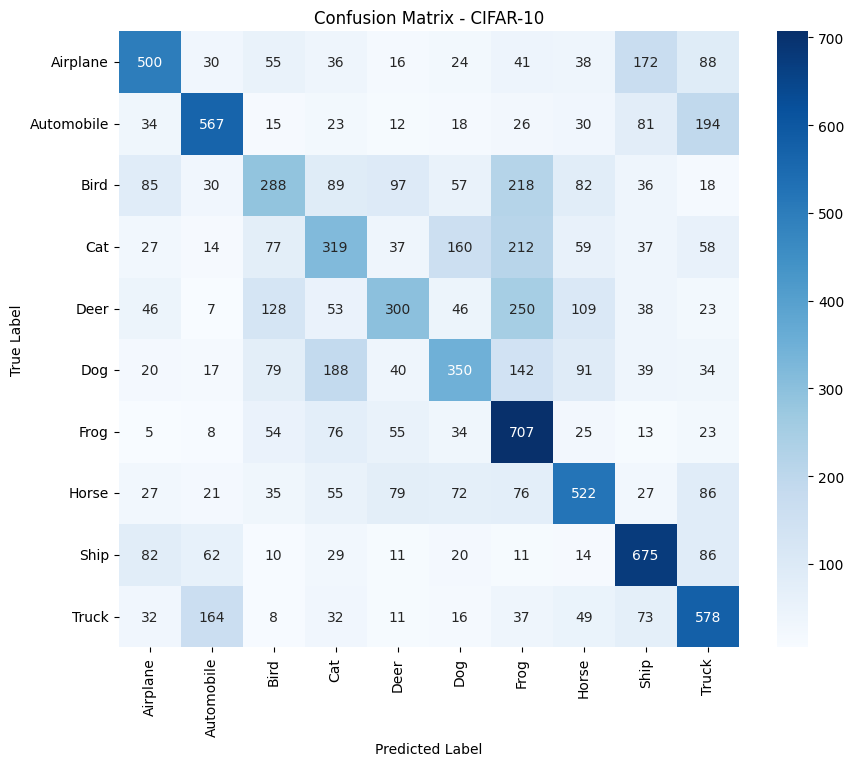

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CIFAR-10')
plt.show()


### Model Improvements

In [34]:
def build_model(layer_sizes=[256, 128], dropout_rate=0.3):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    for size in layer_sizes:
        model.add(Dense(size, activation='relu'))
        model.add(Dropout(dropout_rate))  # helps reduce overfitting
    model.add(Dense(10, activation='softmax'))
    return model

# Example usage
model = build_model([256, 128])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
from tensorflow.keras.optimizers import SGD, RMSprop

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
